In [1]:
# 引入库
import numpy as np # 科学运算
from PIL import Image # 图像处理
import os # 系统文件处理 

In [2]:
# 列出此文件夹下的所有文件名 即照片数量
listing = os.listdir('images/')
len(listing) # 数量

60000

In [3]:
# load函数 
def load(path="images/"):
    '''
    INPUT:
    path            : the path of folder to be processed
    
    OUTPUT:
    X, Y
    '''
    if path[-1] != '/':
        path += '/'
    
    listing = os.listdir(path)
    
    X = np.zeros((60000, 784)) # 初始化特征
    Y = np.zeros((60000, 1)) # 初始化label 真实值
    
    for i in range(len(listing)):
        img = Image.open('images/' + listing[i]).convert('L') # Image库中的open方法 转换成灰度照片
        arr = np.asarray(img) # 将照片转换成矩阵 28*28矩阵
        label = listing[i][-5] # 真实数据
        X[i] = arr.flatten() # 照片矩阵扁平化 （1*784的行矩阵） 储存为第I个样本
        Y[i] = label    
    return X, Y # 返回X.Y矩阵
    
X, Y = load() # 导入数据

[8.]


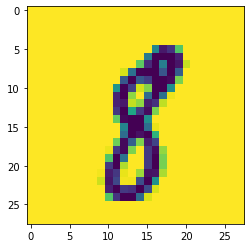

In [4]:
from matplotlib.pyplot import imshow # 引入库 打印照片 

index = 300 # random

%matplotlib inline 
matrix = np.reshape(X[index], (28, 28)) # 将第i个样本转换成28*28的矩阵
img = Image.fromarray(matrix) # 将矩阵转化成照片
imshow(np.asarray(img)) # 打印照片
print(Y[index]) # 打印照片对应的真实值

In [22]:
from sklearn.model_selection import train_test_split # 引入库 
xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.05) # Train Test X-Y 训练测试集合 95%的数据作为训练集 5%的数据作为测试集

xTr, xVa, yTr, yVa = train_test_split(xTr, yTr, test_size=0.10) # Train Validation 将训练集再细分为90%练习集和10%验证集
#为什么需要训练集合？
#期末考试-平时测试

In [23]:
print(xTr.shape)
print(yTr.shape)
print(xVa.shape)
print(yVa.shape)
print(xTe.shape)
print(yTe.shape)

(51300, 784)
(51300, 1)
(5700, 784)
(5700, 1)
(3000, 784)
(3000, 1)


In [7]:
from sklearn.neighbors import KNeighborsClassifier # kNN
knn = KNeighborsClassifier(n_neighbors=3) # 新建kNN模型 k取3
knn.fit(xTr, yTr.ravel()) # 训练模型 fit-适应 ravel（）把列矩阵变成向量

KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.score(xVa, yVa) # 通过验证集检测模型准确率

0.9763157894736842

In [14]:
def imageResize(path):
    image = Image.open(path)
    size = (28, 28) # 新建变量tuple类型的 size 
    image.thumbnail(size) # 将图片变成size大小
    image.save('testimage.png') # 保存文件

In [15]:
imageResize('test.png') # 调用函数

这次测试我们自己拍的照片
预测的数字是：4.0
实际的数字是：4


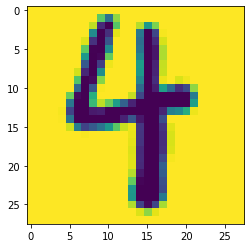

In [25]:
img = Image.open('testimage.png').convert('L') # 变成灰度模式
arr = np.asarray(img)
label = 4
x = arr.flatten()
pred = knn.predict(x.reshape((1,784))) # 变成行矩阵，只能接受矩阵
print("这次测试我们自己拍的照片")
print("预测的数字是："+str(pred[0])) 
print("实际的数字是："+str(label))

%matplotlib inline
matrix = np.reshape(x, (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img)) # 打印照片

这次测试验证集中的第4056个照片
预测的数字是：1.0
实际的数字是：1.0


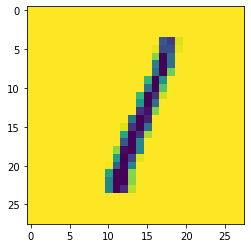

In [28]:
from random import randrange
index = randrange(5700) # 随机选取一个

%matplotlib inline
matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0] # 预测数值
y = yVa[index][0] # 真实值
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [33]:
y_hat = np.reshape(knn.predict(xVa), (5700, 1)) # 所有的预测结果->列矩阵

In [34]:
wrong_indices = np.where(np.not_equal(y_hat, yVa))[0]
len(wrong_indices) # 所有预测有误的地方的总数

73

这次测试验证集中的第3585个照片
预测的数字是：7.0
实际的数字是：9.0


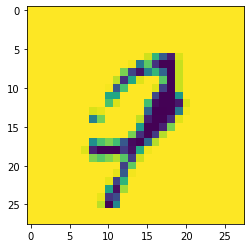

In [39]:
%matplotlib inline

from random import randrange
index = wrong_indices[randrange(len(wrong_indices))]

matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0]
y = yVa[index][0]
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [40]:
np.unique(yVa[wrong_indices], return_counts=True) # 显示每个数错误了几次

(array([0., 2., 3., 4., 5., 7., 8., 9.]),
 array([ 2, 10, 10,  8,  3, 13, 16, 11], dtype=int64))

In [42]:
np.unique(yTr, return_counts=True) # 每个数在验证集中出现的次数 需要每个数出现差不多 如果一个数过多的话 预测结果就会出现偏差
# 如果出现60000个 1 那么机器无论遇见什么数字 都会将其视为1

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([5045, 5795, 5089, 5202, 4998, 4668, 5040, 5354, 5029, 5080],
       dtype=int64))

In [43]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1,2,3,4,5,6,7,8,9,10]
scores = np.zeros(10) # 初始化一个np.array

for i in range(len(ks)):
    k = ks[i]
    knn = KNeighborsClassifier(n_neighbors=k).fit(xTr, yTr.ravel())
    scores[i] = knn.score(xVa, yVa)
    
scores

array([0.96929825, 0.96491228, 0.97192982, 0.97017544, 0.97122807,
       0.97210526, 0.97210526, 0.96807018, 0.96719298, 0.96596491])

In [16]:
from sklearn.neural_network import MLPClassifier # 深度学习神经网路

In [17]:
nn_model = MLPClassifier(hidden_layer_sizes=(500,200,50,30,30,15)).fit(xTr, yTr) # 初始化模型并且训练

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
nn_model.score(xVa, yVa) # 结果很不好

0.12368421052631579

In [19]:
from sklearn.ensemble import RandomForestClassifier # 随机森林

In [20]:
model = RandomForestClassifier(n_estimators=1000).fit(xTr, yTr)

<ipython-input-20-8936e23eea3f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=1000).fit(xTr, yTr)


In [21]:
model.score(xVa, yVa)

0.9719298245614035